In [1]:
## Part 1: Analyze and Explore the Climate Data

In [2]:
#Import Dependencies

In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

In [5]:
#Link Python to the database by creating a SQLAlchemy session

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime, timedelta

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
['measurement', 'station']

['measurement', 'station']

In [12]:
#save references to the classes
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [ ]:
##Precipitation Analysis

In [14]:
# 1.
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()

# Print the most recent date
most_recent_date

'2017-08-23'

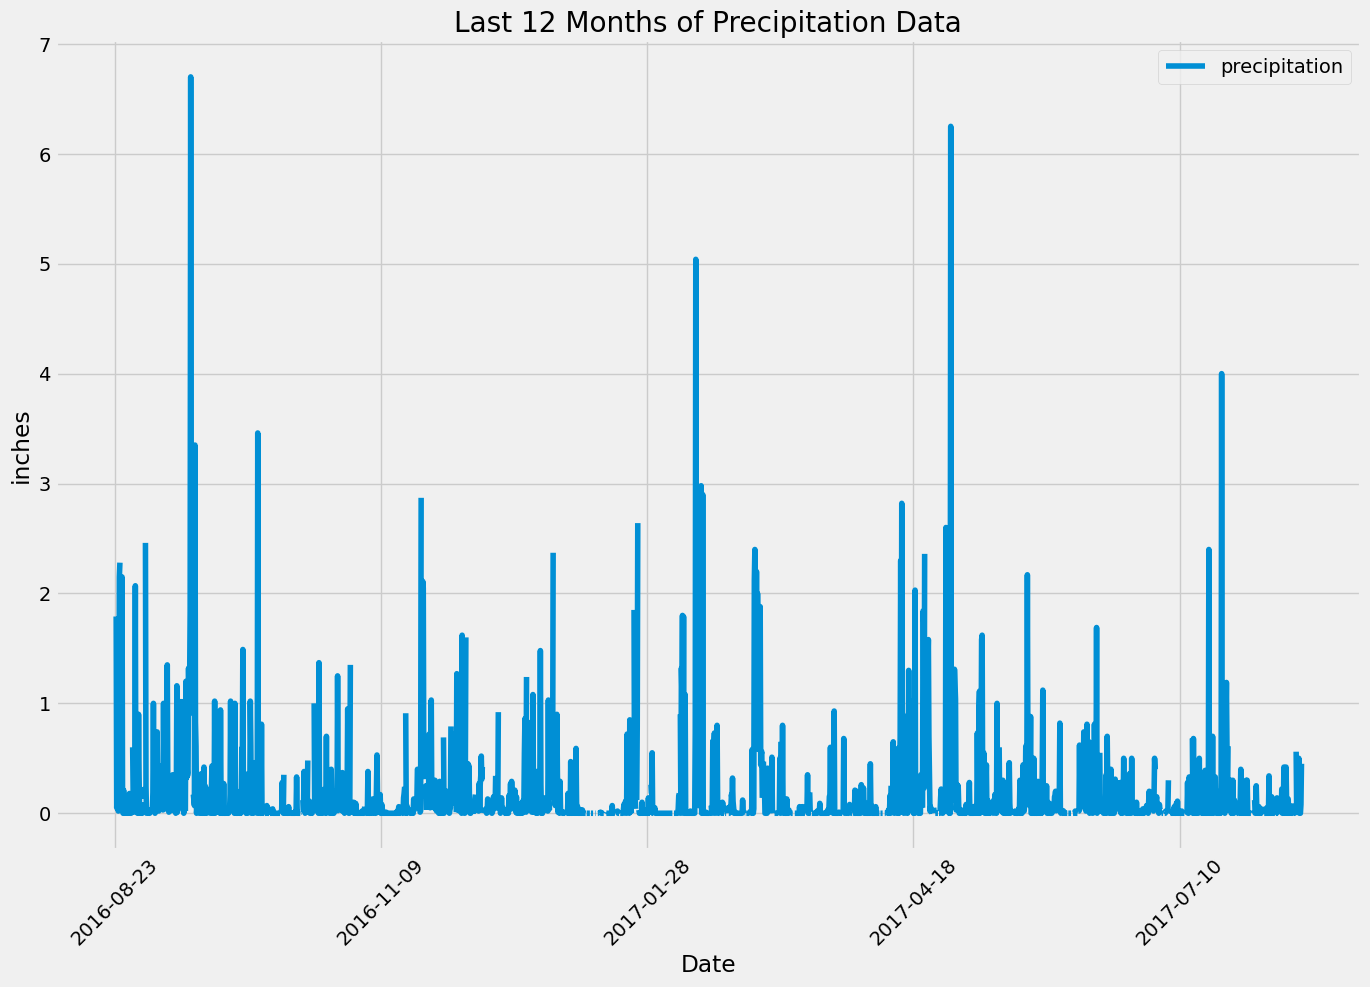

In [36]:
#2 
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

#3
# Perform a query to retrieve the data and precipitation scores
#select only the date and precipitation values
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

#4
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)

#5
# Sort the dataframe by date
df = df.sort_index()

#6
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, figsize=(15, 10))
plt.xlabel('Date')
plt.ylabel('inches')
plt.title("Last 12 Months of Precipitation Data")
plt.xticks(rotation=45)
plt.legend(loc = 'upper right')

In [49]:
# 7
# Use Pandas to print the summary statistics for the precipitation data
# Calculate summary statistics for the precipitation data
stats = df.describe()
stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [39]:
## Station Analysis

In [45]:
#1
#Design a query to calculate the total number of stations in the dataset
# Query to calculate the total number of stations
total_stations = session.query(func.count(Station.station)).scalar()

# Print the total number of stations
total_stations

9

In [85]:
#2
#Design a query to find the most-active stations
#List the stations and observation counts in descending order
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Display the stations and their counts in descending order
for station, count in most_active_stations:
    print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [87]:
#Answer the following question: which station id has the greatest number of observations?
most_active_station = most_active_stations[0][0]

print("The stations with the highest observations is", most_active_station)

The stations with the highest observations is USC00519281


In [89]:
#3
#Design a query that calculates the lowest, highest, and average temperatures that filters on the most-active station id
temp_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()


# Extract the results
lowest_temp, highest_temp, avg_temp = temp_stats[0]

# Print the results
print(f"Lowest Temperature: {lowest_temp} F")
print(f"Highest Temperature: {highest_temp} F")
print(f"Average Temperature: {avg_temp:.2f} F")

Lowest Temperature: 54.0 F
Highest Temperature: 85.0 F
Average Temperature: 71.66 F


Text(0, 0.5, 'Frequency')

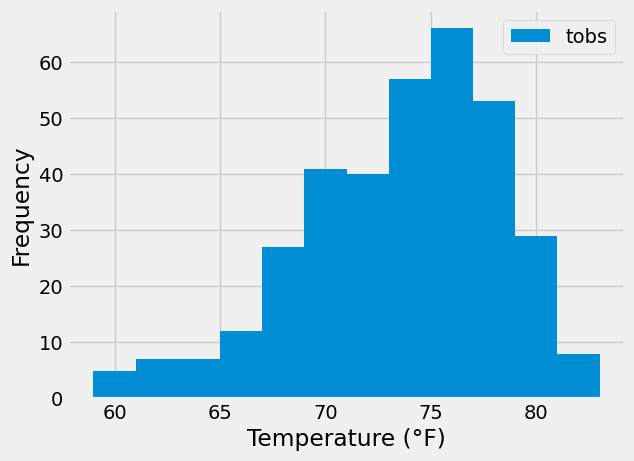

In [111]:
#4
#Design a query to get the previous 12 months of temperature observation (TOBS)
import datetime as dt
from pandas.plotting import table

#Query the previous 12 months of TOBS data for that station.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

#Filter by the station that has the greatest number of observations
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()

#create a dataframe
df = pd.DataFrame(results, columns=['tobs'])

#Plot the results as a histogram with bins=12
#print(df)
df.plot.hist(bins=12)
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")

In [112]:
#5
#close session
session.close()